# Galaxies

### Multiple runs

In this notebook we show the memberhip selection perfomance of the copacabana output for different runs

### Import Packages

In [4]:
from astropy.table import Table, vstack
from astropy.io.fits import getdata

import pandas as pd

import matplotlib
import numpy as np

from collections import defaultdict
from matplotlib import pylab
import matplotlib.pyplot as plt

from scipy import stats
import sklearn

import seaborn as sns

import os

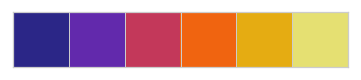

In [5]:
import seaborn as sns; sns.set(color_codes=True)
sns.set_style("whitegrid")
sns.palplot(sns.color_palette("CMRmap"))

In [6]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score

### Loading Data

In [7]:
from plotLibrary import viewMembershipSelection

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using Modified sklearn.mixture.GMM, modified to allow data weights


In [8]:
# runs=['emuBPZ-r200','gauss003-r200','gauss005-r200']
# runs=['emuBPZ-rhod','gauss003-rhod','gauss005-rhod']

## the run we take a look into is:
pz_labels = ['gauss001','gauss003','gauss005',None,'dnf_model']
runs= ['%s-r200'%li for li in pz_labels[:-2]]
runs+= ['dnf-r200','dnf003-r200']
#runs= [run1,run2,run3,run4]

In [11]:
x = np.arange(len(runs))
colors = np.array([sns.color_palette("CMRmap")[::1][xx] for xx in x])

In [15]:
vm = viewMembershipSelection(cfg='../config_files/config_buzzard_v2.yaml',dataset='buzzard_v2')
# vm = viewMembershipSelection(cfg='../config_files/config_copa_dc2.yaml',dataset='cosmoDC2')

master file: 
 /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00000.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00016.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00017.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00018.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00019.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00020.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00022.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00032.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00033.hdf5
/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output

In [18]:
for run in runs:
    print('run: %s'%run)
    vm.load_data(run)

Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with main and BMA
Matching Copa output with

In [29]:
for run in runs:    
    vm.compute_precision_recall_curves(run,prob='Pmem',th='True')

Text(0.5,1,'Completeness, Purity')

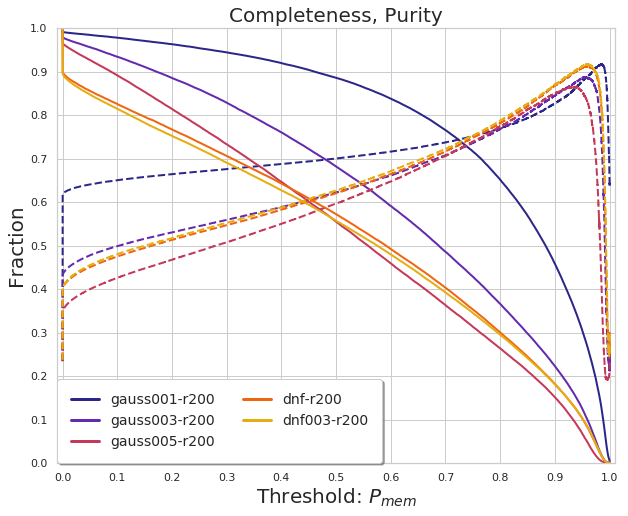

In [37]:
plt.figure(figsize=(10,8))

for color,run in zip(colors,runs):
    plt.axvline(-1.,color=color,label=run,lw=3)

plt.legend(fontsize=14, loc=3, shadow=True, borderaxespad=0.,ncol=int(len(runs)/2),borderpad=1)

for color,run in zip(colors,runs):
    vm.plot_precision_recall_vs_threshold(run,c1=color)
    #plt.legend()
    
plt.xlabel(r'Threshold: $P_{mem}$', fontsize=20)
plt.ylabel('Fraction', fontsize=20)
plt.title('Completeness, Purity',fontsize=20)

Text(0,0.5,'Purity')

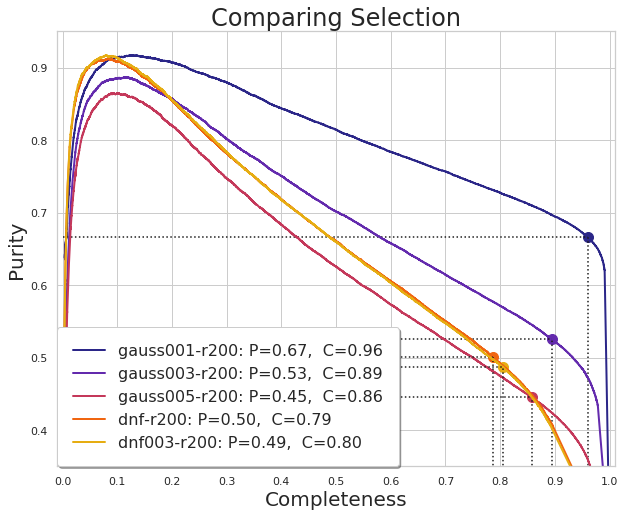

In [21]:
plt.figure(figsize=(10, 8))

for color,run in zip(colors,runs):
    vm.plot_purity_completeness(run,color=color)
    #plt.legend()
plt.ylim(0.35,0.95)
plt.legend(fontsize=16, loc=3, shadow=True, borderaxespad=0.,borderpad=1)
plt.title('Comparing Selection',fontsize=24)

plt.xlabel(r'Completeness', fontsize=20)
plt.ylabel('Purity', fontsize=20)
# plt.title('Completeness, Purity',fontsize=20)

### PDF validation

Copacabana should in priciple recover the PDF of the true members distribution. Here in the plots below, we check the PDF for the variables $R, z, color$

In [22]:
def getTruthTable(gal):
    gal2 = gal[gal['True']==True].copy()
    gal2['Pmem'] = 1.
    return gal2

In [31]:
gal = vm.datasets[runs[0]]
gal2= getTruthTable(gal)
keys = np.unique(gal['CID'])

In [32]:
from plotLibrary import generalPlots

In [33]:
allPlots = generalPlots(title='Buzzard')

plotLibrary.py:366: RuntimeWarning: overflow encountered in divide
  per_error = np.where(pdf/pdf2>1e6,0.,(pdf-pdf2)/pdf2)


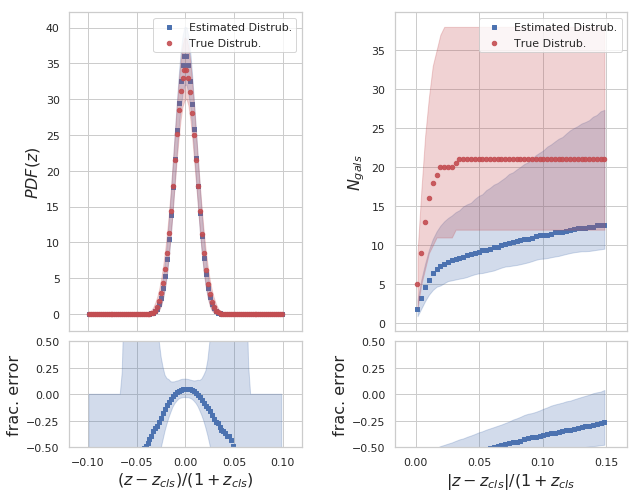

In [34]:
allPlots.plot_validation_pdf_redshift(gal,gal2,keys)

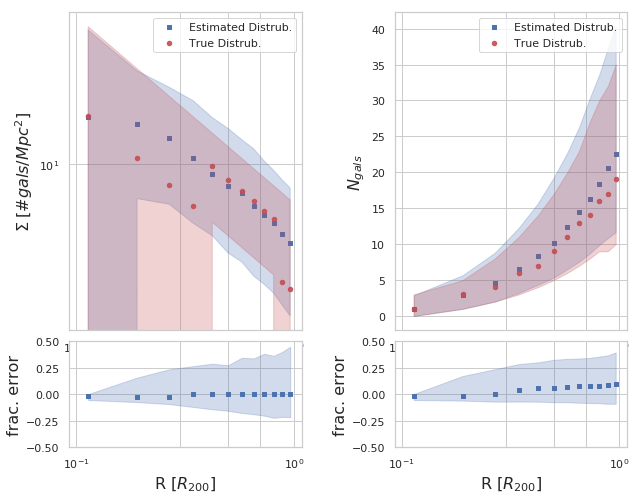

In [35]:
allPlots.plot_validation_pdf_radial(gal,gal2,keys)

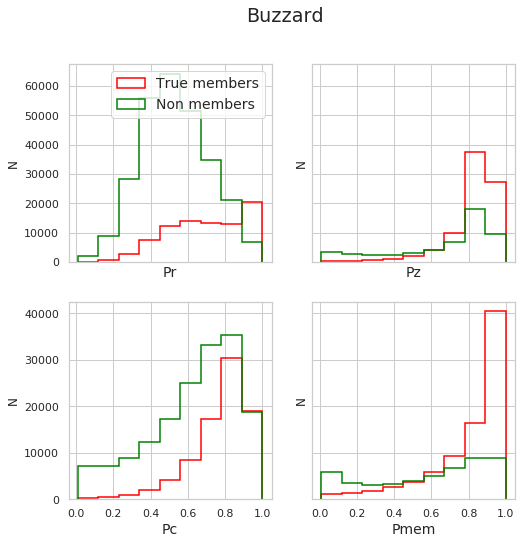

In [36]:
allPlots.plot_grid_histograms(gal)